In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cars.csv')
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [3]:
df.dtypes

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object

In [4]:
df.isnull().sum()/df.shape[0]*100

Car       0.0
Model     0.0
Volume    0.0
Weight    0.0
CO2       0.0
dtype: float64

<Axes: >

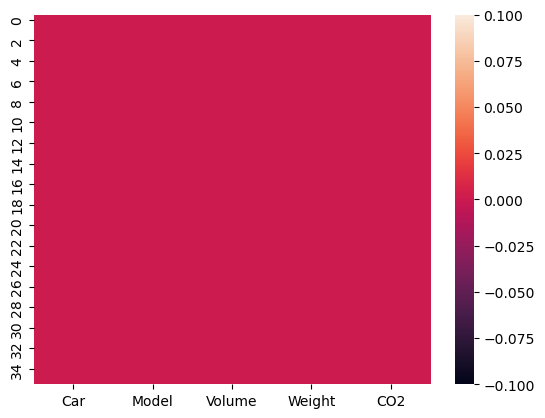

In [5]:
sb.heatmap(df.isnull())

<Axes: xlabel='Weight', ylabel='Car'>

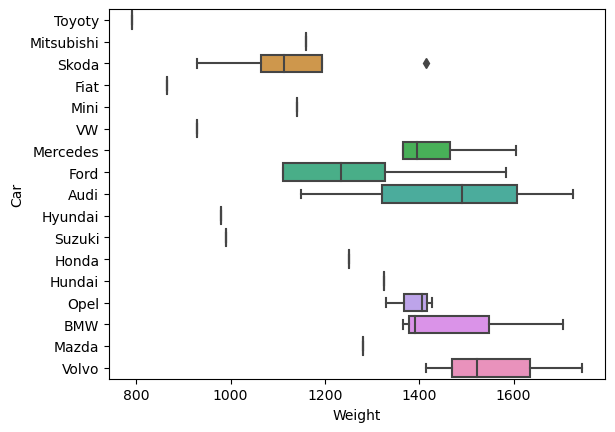

In [12]:
sb.boxplot(data=df,x='Weight',y='Car')

<Axes: xlabel='Volume', ylabel='CO2'>

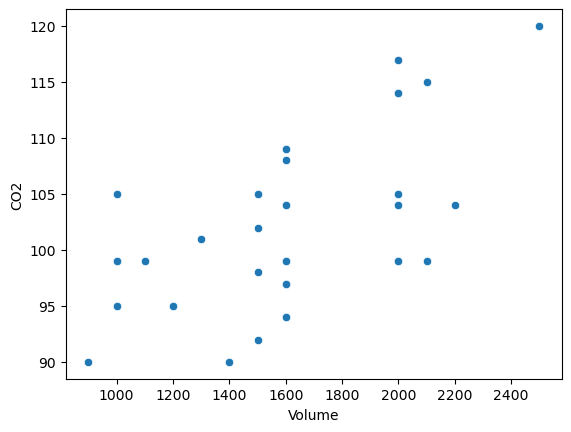

In [10]:
sb.scatterplot(data=df,x='Volume',y='CO2')

<Axes: xlabel='Weight', ylabel='CO2'>

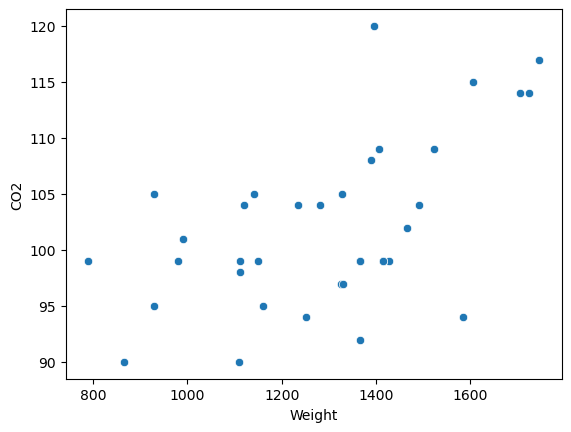

In [13]:
sb.scatterplot(data=df,x='Weight',y='CO2')

<Axes: >

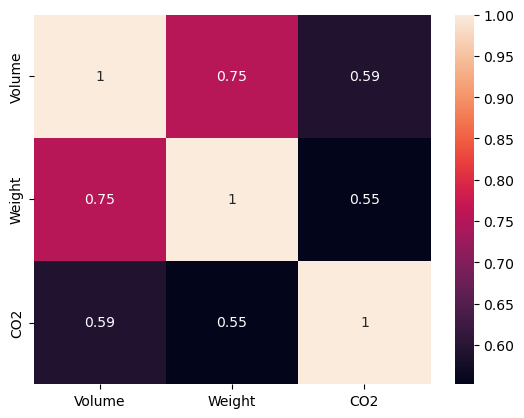

In [14]:
sb.heatmap(df.corr(),annot=True)

In [16]:
x=df[['Weight','Volume']]
y=df['CO2']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
X_train.shape

(25, 2)

In [20]:
X_test.shape

(11, 2)

In [21]:
Y_train.shape

(25,)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss=StandardScaler()

In [24]:
X_train=ss.fit_transform(X_train)


In [25]:
X_test=ss.transform(X_test)

In [26]:
X_train

array([[ 0.73673238,  0.22222222],
       [ 0.85193321,  1.33333333],
       [ 1.08233488, -0.05555556],
       [-0.41527597, -0.05555556],
       [-1.38757101, -1.44444444],
       [ 0.44181824,  0.22222222],
       [-1.15256131, -1.16666667],
       [ 0.0224872 ,  0.22222222],
       [ 0.62153154,  1.61111111],
       [ 2.37719226,  1.33333333],
       [ 1.63069085,  0.22222222],
       [-0.51204467,  0.22222222],
       [-0.558125  , -0.33333333],
       [ 0.10082377,  0.22222222],
       [ 0.62153154, -0.05555556],
       [ 0.75977254,  2.72222222],
       [-0.3231153 , -0.88888889],
       [ 0.62153154,  0.22222222],
       [-2.02808765, -1.44444444],
       [ 0.46025037,  0.22222222],
       [-1.38757101, -1.44444444],
       [-1.10648098, -0.61111111],
       [-0.36919563,  0.22222222],
       [-0.5443009 , -0.05555556],
       [-0.5443009 , -1.44444444]])

In [27]:
X_test

array([[ 1.72745955,  1.61111111],
       [ 0.80585288,  0.22222222],
       [ 1.34960082,  0.22222222],
       [-1.68248515, -1.72222222],
       [ 0.45103431,  1.33333333],
       [ 0.22984871,  1.88888889],
       [ 0.91183765,  1.33333333],
       [ 0.85193321,  0.22222222],
       [ 2.18826289,  1.33333333],
       [ 1.19753572,  1.33333333],
       [ 2.28042356,  1.33333333]])

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
lr.coef_

array([-0.94681959,  4.0777815 ])

In [30]:
lr.intercept_

100.44

In [31]:
ypred=lr.predict(X_test)

In [32]:
ypred

array([105.37416653, 100.58317637, 100.06834517,  95.01016398,
       105.44999388, 107.92485091, 105.01369625, 100.53954661,
       103.80515182, 104.74319172, 103.71789229])

In [33]:
dict={"Actual output":Y_test,"Predict output":ypred}
dd=pd.DataFrame(dict)
dd

,Actual output,Predict output
30,115,105.374167
34,109,100.583176
28,109,100.068345
3,90,95.010164
19,105,105.449994
17,104,107.924851
21,99,105.013696
23,99,100.539547
29,114,103.805152
26,104,104.743192


In [34]:
from sklearn.metrics import mean_squared_error
print("mean squared error",mean_squared_error(Y_test,ypred))

mean squared error 48.42968080506025


In [36]:
b=mean_squared_error(Y_test,ypred)

gg=np.sqrt(b)
gg

6.959143683317672

In [39]:
from sklearn.metrics import r2_score
r2_score(Y_test,ypred)

0.09484223394929092